# Dépenses de l'état

In [27]:
import pandas as pd

dépense = pd.read_csv("dépense_état.csv", index_col=0)

dépense

,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ACO,DEF,DET,DIV
1872,18.0,0.5,0.1,6.7,0.5,2.1,2.0,0.0,26.4,41.5,2.1
1880,14.1,0.8,0.1,15.3,1.9,3.7,0.5,0.0,29.8,31.3,2.5
1890,13.6,0.7,0.7,6.8,0.6,7.1,0.7,0.0,33.8,34.4,1.7
1900,14.3,1.7,1.7,6.9,1.2,7.4,0.8,0.0,37.7,26.2,2.2
1903,10.3,1.5,0.4,9.3,0.6,8.5,0.9,0.0,38.4,27.2,3.0
1906,13.4,1.4,0.5,8.1,0.7,8.6,1.8,0.0,38.5,25.3,1.9
1909,13.5,1.1,0.5,9.0,0.6,9.0,3.4,0.0,36.8,23.5,2.6
1912,12.9,1.4,0.3,9.4,0.6,9.3,4.3,0.0,41.1,19.4,1.3
1920,12.3,0.3,0.1,11.9,2.4,3.7,1.7,1.9,42.4,23.1,0.2
1923,7.6,1.2,3.2,5.1,0.6,5.6,1.8,10.0,29.0,35.0,0.9


## k-means global

On cherche le nombre de classes pour  les $k$-means

In [28]:
from sklearn.cluster import KMeans

In [29]:
data = dépense

inertie = []

for nb in range(1, 10):
    kmeans = KMeans(n_clusters=nb,
                    n_init=10, 
                    max_iter=300).fit(data)
    inertie.append(kmeans.inertia_)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

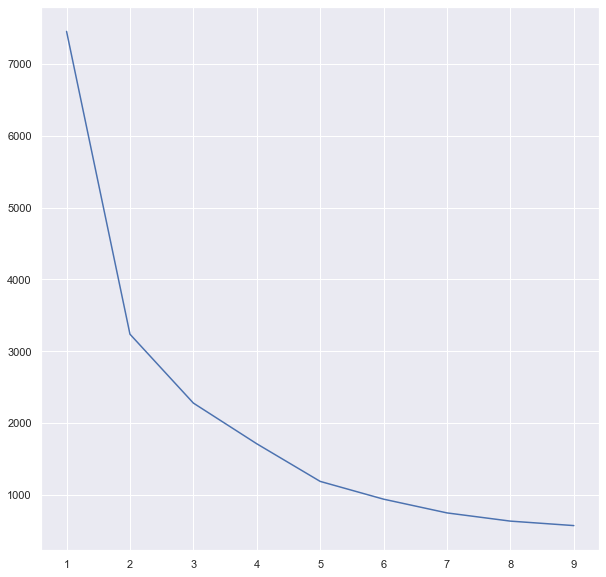

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.lineplot(x=list(range(1, len(inertie) + 1)), 
             y=inertie, 
             legend=False,
             ax=ax)
plt.show()

5 classes à l'air d'être le point d'inflexion

In [32]:
kmeans = KMeans(n_clusters=5,
                n_init=10, 
                max_iter=300).fit(data)

In [33]:
kmeans.inertia_

1185.537261904762

In [34]:
kmeans.cluster_centers_

array([[12.74      ,  2.82      , 10.1       ,  9.        , 10.98      ,
         9.38      ,  6.3       ,  4.06      , 28.78      ,  5.54      ,
         0.3       ],
       [12.4       ,  1.21428571,  0.67142857,  8.64285714,  1.07142857,
         8.        ,  2.7       ,  1.11428571, 39.37142857, 23.27142857,
         1.6       ],
       [12.35      ,  4.45      ,  8.125     ,  7.525     ,  5.45      ,
        20.025     , 10.575     ,  4.475     , 20.775     ,  5.375     ,
         0.95      ],
       [12.76      ,  0.7       ,  0.9       ,  7.68      ,  1.08      ,
         5.02      ,  1.42      ,  4.02      , 27.78      , 36.76      ,
         1.9       ],
       [ 9.8       ,  1.33333333,  0.76666667,  8.56666667,  1.8       ,
        10.16666667,  5.26666667, 12.16666667, 28.23333333, 21.16666667,
         0.8       ]])

In [35]:
clusters_kmeans = kmeans.predict(data)

clusters_kmeans

array([3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 4, 4, 4, 1, 0, 0, 0, 0, 0, 2, 2,
       2, 2], dtype=int32)

In [36]:
clusters = [[], [], [], [], []]

for i, cluster in enumerate(clusters_kmeans):
    clusters[cluster].append(dépense.index[i])
    
clusters

[[1947, 1950, 1953, 1956, 1959],
 [1900, 1903, 1906, 1909, 1912, 1920, 1938],
 [1962, 1965, 1968, 1971],
 [1872, 1880, 1890, 1923, 1926],
 [1929, 1932, 1935]]

## k-means ACP

Refaite l'exercice précédent, mais uniquement sur les 2 premiers axes de l'ACP sur des données **non centrées ni réduites**.

In [37]:
from sklearn.decomposition import PCA 
import numpy as np
import pandas

On utilise les données non centrées ni réduites :

In [38]:
X = dépense

In [39]:
pca = PCA()
pca.fit(X)

U = np.transpose(pca.components_) # vecteurs propres
I = pandas.DataFrame(np.transpose(pca.explained_variance_ratio_), columns=["pourcentage"])  # information véhiculée

C = pandas.DataFrame(X @ U, index=X.index) # nouvelles coordonnées

In [40]:
data = C.iloc[:, [0, 1]]

data

,0,1
1872,39.774436,-8.868841
1880,31.521696,-15.977332
1890,34.291491,-16.502266
1900,27.840416,-22.620343
1903,28.984357,-22.672895
1906,27.178709,-23.417475
1909,24.900042,-22.474629
1912,22.221526,-27.438636
1920,27.261774,-28.375810
1923,32.645375,-8.646497


In [41]:
inertie = []

for nb in range(1, 10):
    kmeans = KMeans(n_clusters=nb,
                    n_init=10, 
                    max_iter=300).fit(data)
    inertie.append(kmeans.inertia_)

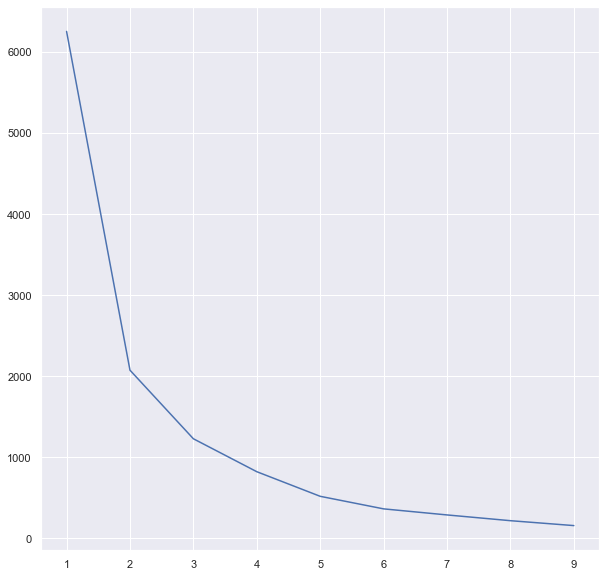

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.lineplot(x=list(range(1, len(inertie) + 1)), 
             y=inertie, 
             legend=False,
             ax=ax)
plt.show()

On voit que 5 classes suffisent également

In [43]:
kmeans = KMeans(n_clusters=5,
                n_init=10, 
                max_iter=300).fit(data)

clusters_kmeans = kmeans.predict(data)

clusters = [[], [], [], [], []]

for i, cluster in enumerate(clusters_kmeans):
    clusters[cluster].append(dépense.index[i])
    
clusters

[[1947, 1953, 1956, 1959],
 [1900, 1903, 1906, 1909, 1912, 1920, 1938],
 [1929, 1932, 1935],
 [1872, 1880, 1890, 1923, 1926],
 [1950, 1962, 1965, 1968, 1971]]

In [44]:
#centres

centers = kmeans.cluster_centers_
centers

#couleurs 
current_palette = sns.color_palette()
colors = {i: current_palette[i] for i in range(len(centers))}

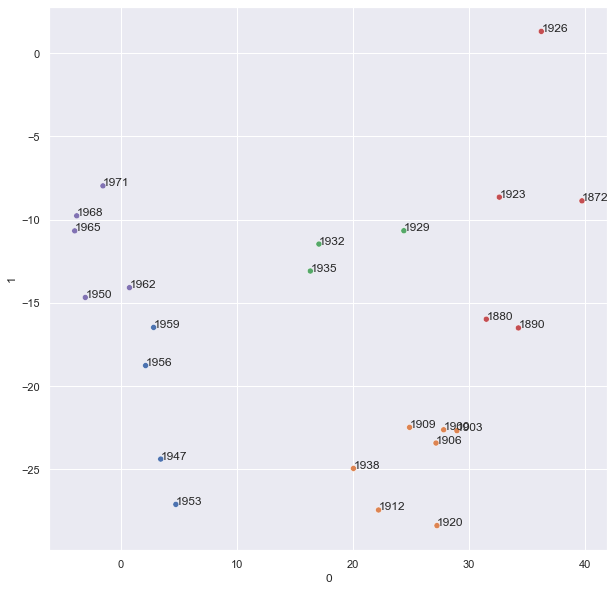

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))

draw = sns.scatterplot(x=0, 
                y=1, 
                data=data,
                hue=clusters_kmeans,
                palette=colors,
                legend=False,
                ax=ax)

for index, row in data.iterrows():
    draw.annotate(str(index), (row[0], row[1]))
                 

plt.show()

Les classes peuvent être identiques, mais l'inertie est beaucoup plus petite pour la deuxième classification.

## Centrer et réduire

On refait l'ACP sur des données centrées et réduite cette fois-ci.

In [46]:
from sklearn.preprocessing import StandardScaler
import pandas

In [47]:
scaler = StandardScaler()

X = pandas.DataFrame(scaler.fit_transform(dépense), columns=dépense.columns)

In [48]:
pca = PCA()
pca.fit(X)

U = np.transpose(pca.components_) # vecteurs propres
I = pandas.DataFrame(np.transpose(pca.explained_variance_ratio_), columns=["pourcentage"])  # information véhiculée

C = pandas.DataFrame(X @ U, index=X.index) # nouvelles coordonnées

In [49]:
data = C.iloc[:, [0, 1]]

data

,0,1
0,-2.900539,-1.024429
1,-2.767389,-2.011953
2,-2.416316,-0.224014
3,-2.056634,-0.755155
4,-2.337858,-0.167246
5,-1.985142,-0.626137
6,-1.907355,-0.812222
7,-1.431071,-0.768419
8,-2.139175,-0.955910
9,-1.142910,2.883950


In [50]:
inertie = []

for nb in range(1, 10):
    kmeans = KMeans(n_clusters=nb,
                    n_init=10, 
                    max_iter=300).fit(data)
    inertie.append(kmeans.inertia_)

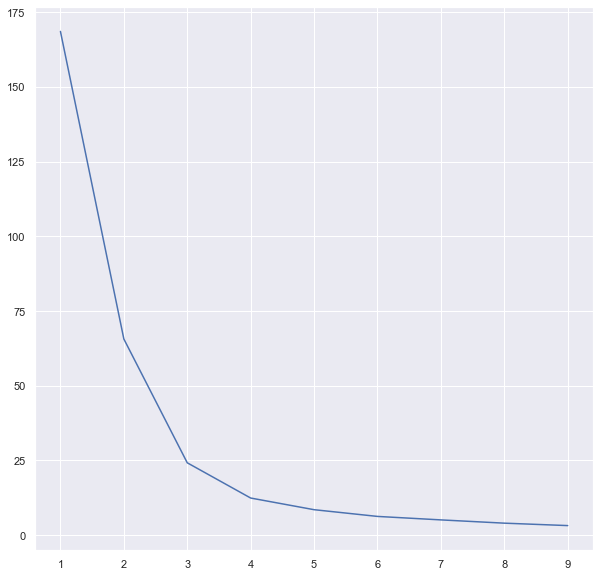

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.lineplot(x=list(range(1, len(inertie) + 1)), 
             y=inertie, 
             legend=False,
             ax=ax)
plt.show()

Ici 4 classes est suffisant et l'inertie est minuscule.

In [52]:
kmeans = KMeans(n_clusters=4,
                n_init=10, 
                max_iter=300).fit(data)

clusters_kmeans = kmeans.predict(data)

clusters = [[], [], [], []]

for i, cluster in enumerate(clusters_kmeans):
    clusters[cluster].append(dépense.index[i])
    
clusters

[[1956, 1959, 1962, 1965, 1968, 1971],
 [1872, 1880, 1890, 1900, 1903, 1906, 1909, 1912, 1920],
 [1923, 1926, 1929, 1932, 1935, 1938],
 [1947, 1950, 1953]]